##🧩 Step 1: Import Libraries and Load Dataset


In [33]:
#Import Libaray:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr, chi2_contingency


In [34]:
#Load Dataset:
df=pd.read_csv("/content/adult.csv")

##Dataset Description – Adult Income Dataset

This dataset contains demographic and work-related information about individuals, used to predict whether a person earns more than or less than $50,000 per year.

Each row represents a person’s record, including details such as age, workclass, education, marital status, occupation, relationship, race, gender, hours worked per week, and native country.

The target column is income, which has two possible values:

- <=50K → person earns less than or equal to $50,000

- >50K → person earns more than $50,000

This dataset is commonly used for classification tasks in data mining and machine learning to understand how various social and economic factors relate to income levels.

In [35]:
print(df.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [37]:
# Check total missing values in each column
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [38]:
# So we also check for '?' values
print("\nCount of '?' values in each column:")
print((df == '?').sum())


Count of '?' values in each column:
39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [39]:
print(df.describe())

                 39         77516            13          2174             0  \
count  32560.000000  3.256000e+04  32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05     10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05      2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 40  
count  32560.000000  
mean      40.437469  
std       12.347618  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


##⚙️ Step 3: Handle Numerical Columns (KNN Imputation for 0 values)

In [40]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()
df[['2174', '0']] = df[['2174', '0']].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=3)
df[['2174', '0']] = imputer.fit_transform(df[['2174', '0']])
print("\nAfter KNN Imputation:")
print(df[numeric_cols].head())


After KNN Imputation:
           2174            0
0  12942.511988  1871.428571
1  12942.511988  1871.428571
2  12942.511988  1871.428571
3  12942.511988  1871.428571
4  12942.511988  1871.428571


##🧼 Step 2: Handle Missing Values (‘?’ marks in categorical columns)

In this dataset, the numeric columns containing 0 values (representing missing data) were handled using KNN Imputation, which replaces missing values with estimated ones based on similar records, ensuring data consistency and accuracy.

In [41]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing categorical values with mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if any missing values left
print(df.isnull().sum())

# Show first few rows
print(df.head())

39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64
   39          State-gov   77516   Bachelors  13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
1  38            Private  215646     HS-grad   9             Divorced   
2  53            Private  234721        11th   7   Married-civ-spouse   
3  28            Private  338409   Bachelors  13   Married-civ-spouse   
4  37            Private  284582     Masters  14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male          2174  \
0     Exec-managerial         Husband   White     Male  12942.511988   
1   Handlers-cleaners   Not-in-family   White     Male  12942.511988   
2   Handlers-cleaners         Husband   Black  

/tmp/ipython-input-1144041794.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


##Detect Noise in Numerical Columns

In [42]:
# Detect noise (outliers) using IQR
import numpy as np

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers

# Example for numeric columns
for col in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} noisy values detected.")


39: 143 noisy values detected.
77516: 992 noisy values detected.
13: 1198 noisy values detected.
2174: 2711 noisy values detected.
0: 1519 noisy values detected.
40: 9008 noisy values detected.


In the categorical columns, the missing values represented by ‘?’ were first replaced with NaN to mark them as missing data. Then, these missing values were filled using the mode imputation technique, which replaces them with the most frequent category in each column.

##📊 Step 4: Data Description (Numerical Summary)

###Separate numerical and categorical columns

In [43]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", num_cols.tolist())
print("Categorical Columns:", cat_cols.tolist())


Numerical Columns: ['39', '77516', '13', '2174', '0', '40']
Categorical Columns: ['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'United-States', '<=50K']


##Numerical ↔ Numerical Relationship


 Pearson Correlation:
             39     77516        13          2174             0        40
39     1.000000 -0.076646  0.036527  2.230918e-02  4.102247e-02  0.068756
77516 -0.076646  1.000000 -0.043159  3.122720e-03 -7.210948e-03 -0.018770
13     0.036527 -0.043159  1.000000  7.632027e-02  2.531356e-02  0.148127
2174   0.022309  0.003123  0.076320  1.000000e+00 -2.044732e-16  0.048093
0      0.041022 -0.007211  0.025314 -2.044732e-16  1.000000e+00  0.024061
40     0.068756 -0.018770  0.148127  4.809342e-02  2.406071e-02  1.000000

 Spearman Correlation:
             39     77516        13      2174         0        40
39     1.000000 -0.078137  0.066337 -0.023413  0.059650  0.142910
77516 -0.078137  1.000000 -0.035660  0.002561 -0.011482 -0.021626
13     0.066337 -0.035660  1.000000  0.034800  0.064896  0.167221
2174  -0.023413  0.002561  0.034800  1.000000  0.007358  0.011115
0      0.059650 -0.011482  0.064896  0.007358  1.000000  0.054021
40     0.142910 -0.021626  0.167221  0.

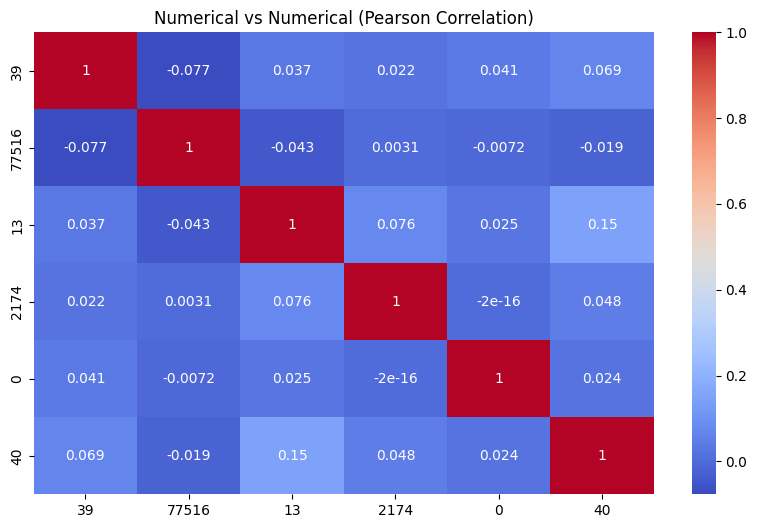

In [44]:
# Pearson Correlation (linear)
print("\n Pearson Correlation:")
print(df[num_cols].corr(method='pearson'))

# Spearman Correlation (rank-based)
print("\n Spearman Correlation:")
print(df[num_cols].corr(method='spearman'))

# Heatmap for visual understanding
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Numerical vs Numerical (Pearson Correlation)")
plt.show()


##Categorical ↔ Categorical Relationship

In [45]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Calculate relationship between categorical columns
print("\n Categorical vs Categorical Relationship (Cramer's V):")
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cv = cramers_v(df[col1], df[col2])
            print(f"{col1} ↔ {col2} : {cv:.3f}")



 Categorical vs Categorical Relationship (Cramer's V):
State-gov ↔ Bachelors : 0.099
State-gov ↔ Never-married : 0.085
State-gov ↔ Adm-clerical : 0.400
State-gov ↔ Not-in-family : 0.099
State-gov ↔ White : 0.056
State-gov ↔ Male : 0.154
State-gov ↔ United-States : 0.046
State-gov ↔ <=50K : 0.179
Bachelors ↔ State-gov : 0.099
Bachelors ↔ Never-married : 0.092
Bachelors ↔ Adm-clerical : 0.187
Bachelors ↔ Not-in-family : 0.123
Bachelors ↔ White : 0.075
Bachelors ↔ Male : 0.096
Bachelors ↔ United-States : 0.133
Bachelors ↔ <=50K : 0.369
Never-married ↔ State-gov : 0.085
Never-married ↔ Bachelors : 0.092
Never-married ↔ Adm-clerical : 0.133
Never-married ↔ Not-in-family : 0.488
Never-married ↔ White : 0.084
Never-married ↔ Male : 0.462
Never-married ↔ United-States : 0.073
Never-married ↔ <=50K : 0.447
Adm-clerical ↔ State-gov : 0.400
Adm-clerical ↔ Bachelors : 0.187
Adm-clerical ↔ Never-married : 0.133
Adm-clerical ↔ Not-in-family : 0.179
Adm-clerical ↔ White : 0.081
Adm-clerical ↔ Male :

##Numerical ↔ Categorical Relationship

In [46]:
from scipy.stats import f_oneway, ttest_ind

print("\n Numerical vs Categorical Relationship:")

for num in num_cols:
    for cat in cat_cols:
        if df[cat].nunique() == 2:  # binary categorical
            groups = df.groupby(cat)[num].apply(list)
            t_stat, p_val = ttest_ind(groups.iloc[0], groups.iloc[1], equal_var=False)
            print(f"{num} ↔ {cat} (T-test): p-value = {p_val:.4f}")
        elif df[cat].nunique() > 2:  # multiple categories
            groups = [vals for name, vals in df.groupby(cat)[num]]
            f_stat, p_val = f_oneway(*groups)
            print(f"{num} ↔ {cat} (ANOVA): p-value = {p_val:.4f}")



 Numerical vs Categorical Relationship:
39 ↔ State-gov (ANOVA): p-value = 0.0000
39 ↔ Bachelors (ANOVA): p-value = 0.0000
39 ↔ Never-married (ANOVA): p-value = 0.0000
39 ↔ Adm-clerical (ANOVA): p-value = 0.0000
39 ↔ Not-in-family (ANOVA): p-value = 0.0000
39 ↔ White (ANOVA): p-value = 0.0000
39 ↔ Male (T-test): p-value = 0.0000
39 ↔ United-States (ANOVA): p-value = 0.0000
39 ↔ <=50K (T-test): p-value = 0.0000
77516 ↔ State-gov (ANOVA): p-value = 0.0000
77516 ↔ Bachelors (ANOVA): p-value = 0.0000
77516 ↔ Never-married (ANOVA): p-value = 0.0000
77516 ↔ Adm-clerical (ANOVA): p-value = 0.0000
77516 ↔ Not-in-family (ANOVA): p-value = 0.0000
77516 ↔ White (ANOVA): p-value = 0.0000
77516 ↔ Male (T-test): p-value = 0.0000
77516 ↔ United-States (ANOVA): p-value = 0.0000
77516 ↔ <=50K (T-test): p-value = 0.0811
13 ↔ State-gov (ANOVA): p-value = 0.0000
13 ↔ Bachelors (ANOVA): p-value = 0.0000
13 ↔ Never-married (ANOVA): p-value = 0.0000
13 ↔ Adm-clerical (ANOVA): p-value = 0.0000
13 ↔ Not-in-fam

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


13 ↔ <=50K (T-test): p-value = 0.0000
2174 ↔ State-gov (ANOVA): p-value = 0.0000
2174 ↔ Bachelors (ANOVA): p-value = 0.0000
2174 ↔ Never-married (ANOVA): p-value = 0.0002
2174 ↔ Adm-clerical (ANOVA): p-value = 0.0000
2174 ↔ Not-in-family (ANOVA): p-value = 0.0000
2174 ↔ White (ANOVA): p-value = 0.0782
2174 ↔ Male (T-test): p-value = 0.0000
2174 ↔ United-States (ANOVA): p-value = 0.8613
2174 ↔ <=50K (T-test): p-value = 0.0000
0 ↔ State-gov (ANOVA): p-value = 0.0000
0 ↔ Bachelors (ANOVA): p-value = 0.0000
0 ↔ Never-married (ANOVA): p-value = 0.0000
0 ↔ Adm-clerical (ANOVA): p-value = 0.0082
0 ↔ Not-in-family (ANOVA): p-value = 0.0000
0 ↔ White (ANOVA): p-value = 0.4240
0 ↔ Male (T-test): p-value = 0.0001
0 ↔ United-States (ANOVA): p-value = 0.7274
0 ↔ <=50K (T-test): p-value = 0.0000
40 ↔ State-gov (ANOVA): p-value = 0.0000
40 ↔ Bachelors (ANOVA): p-value = 0.0000
40 ↔ Never-married (ANOVA): p-value = 0.0000
40 ↔ Adm-clerical (ANOVA): p-value = 0.0000
40 ↔ Not-in-family (ANOVA): p-value 

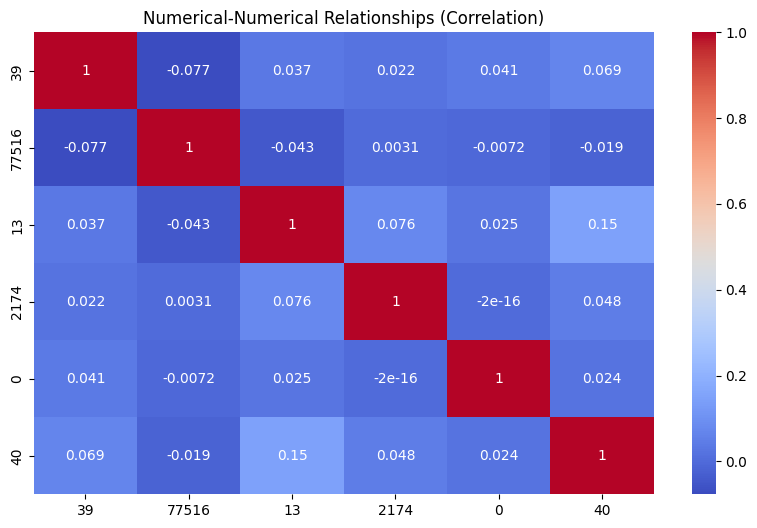

In [47]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Numerical-Numerical Relationships (Correlation)')
plt.show()

##Handle Inconsistency (strip spaces, lower case)

In [48]:
# Remove extra spaces and make text consistent
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

##Normalize Numerical Columns

In [49]:

scaler = MinMaxScaler()
df[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.select_dtypes(include=np.number))
